# KINECT CAMERA GESTURE RECOGNITION KERAS [RAHUL TAPPETLA]

The goal of this task is to understand your approach in solving a hand gesture classification problem using a dataset comprising of depth images obtained from a Kinect v2 Camera (obtained from [Kaggle](https://www.kaggle.com/gti-upm/depthgestrecog) and redistributed under the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 License)](https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode). 

The database is composed by 11 different hand-gestures that are performed by 6 different subjects. The goal of the task is to classify a given frame into one of the 11 gesture classes. The dataset consists of static and dynamic(time-varying gestures: like palm_lr, thumb_ud). For the purpose of this task you can choose to consider all gestures to be static and time-independent.

The database is structured in different folders as (a detailed description can be found below):

    /fist (fist hand-gesture)
        /fist/video_base_1 (base fist hand-gesture of subject 1)
            /fist/video_base_1/s01_g10_011_1.png,...,s01_g10_050_1.png,...
        /fist/video_base_2 (base fist hand-gesture of subject 2)
            /fist/video_base_2/s02_g10_011_1.png,...,s02_g10_050_1.png,...
        /fist/video_base_6 (base fist hand-gesture of subject 6)
            /fist/video_base_6/s06_g10_011_1.png,...,s06_g10_050_1.png,...
        /fist/video_moved_1_1 (moved up fist hand-gesture of subject 1)
            /fist/video_moved_1_1/s01_g10_011_2.png,...,s01_g10_050_2.png,...
        /fist/video_moved_1_2 (moved down fist hand-gesture of subject 1)
            /fist/video_moved_1_2/s01_g10_011_3.png,...,s01_g10_050_3.png,...
        /fist/video_moved_1_8 (moved up and left fist hand-gesture of subject 1)
        /fist/video_moved_1_8/s01_g10_011_9.png,...,s01_g10_050_9.png,...
        /fist/video_moved_6_1 (moved up fist hand-gesture of subject 6)
        /fist/video_moved_6_8 (moved up and left fist hand-gesture of subject 6)
    /grab
    /one_finger
    /palm (palm hand-gesture)
    /thumb_ud

Every root folder (fist, grab,...) contains the range images of one hand-gesture. The folder name is the identifier of the hand-gesture (for example fist, palm, thumb_ud,...).

Inside every root folder, there are 54 folders: 6 of them are the base hand-gestures (/fist/video_base_1,...,/fist/video_base_2) and the others are the moved hand-gestures used to increment the training samples (/fist/video_moved_1_1,...,/fist/video_moved_1_8,...,/fist/video_moved_6_1,...,/fist_video_moved_6_8). Inside every subfolder, there are a set of range hand images that can be true/positive samples or false/negative samples. The structure of the name of each frame is the same: sXX_gYY_ZZZ_M.png where: - XX is the subject identifier. - YY is the gesture identifier. - ZZZ is the number of the frame. - M indicates if the frame belongs to the base video (M = 1) or if it belongs to a moved video (M=2,...9).

For example, the frame 's02_g_05_060_1' indicates that the frame belongs to the fifth gesture, which is performed by the second subject, it is the frame number 60, and it belongs to the base video.

Some of the code snippets below may have bugs and/or can be optimized to improve performance. Feel free to correct and improve the code by editing and adding to the appropriate cells.

If you do not have access to the computing resources required to train a ML based network, please include the full network architecture you propose, and fully functional code that will allow us to train the model on our end. You are free to choose the deep learning framework of your choice, or you may use an approach that is not deep learning based. 

The model must generalize to obtain high accuracy on data that was not included while training. Accuracy will be tested on a hidden test set.

We expect you not to have to spend more than 4 hours on this task, including training time. Please feel free to mention in comments if there are further improvements you would have implemented in the future.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)


Mounted at /content/gdrive


In [0]:
!ls /content/gdrive/'My Drive'/MicroVis_Challenge/depthGestRecog.tar.gz

'/content/gdrive/My Drive/MicroVis_Challenge/depthGestRecog.tar.gz'


In [0]:
import tarfile
tar = tarfile.open('/content/gdrive/My Drive/MicroVis_Challenge/depthGestRecog.tar.gz', "r:gz")
tar.extractall()

In [0]:
!ls /content/depthGestRecog/

fist  one_finger  palm_lr  pick		  thumb_d  thumb_ud
grab  palm	  palm_ud  three_fingers  thumb_u


In [0]:
# Import any other libraries and frameworks you may be using

import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import tqdm

### Below cell is used to create a Python dictionary that maps the gesture string to a class number. The code is not optimal and there is a bug in the code that prevents it from executing. Please make changes as necessary.

In [0]:
os.listdir(data_dir)

['grab',
 'thumb_ud',
 'palm_lr',
 'three_fingers',
 'palm_ud',
 'one_finger',
 'thumb_u',
 'fist',
 'thumb_d',
 'pick',
 'palm']

In [0]:
os.listdir(os.path.join(data_dir,'thumb_ud'))[:10]

['video_moved_6_8',
 'video_moved_1_8',
 'video_base_5',
 'video_moved_5_2',
 'video_moved_4_8',
 'video_moved_2_8',
 'video_moved_3_5',
 'video_base_1',
 'video_base_3',
 'video_moved_3_3']

In [0]:
os.listdir(os.path.join(data_dir,'thumb_ud','video_moved_6_6'))[0][5:7]

'06'

In [0]:
data_dir = "/content/depthGestRecog"

label_dict={}


for label in os.listdir(data_dir):
    for sub_dir in os.listdir(os.path.join(data_dir,label)):
        class_num = int(os.listdir(os.path.join(data_dir,label,sub_dir))[0][5:7])

    label_dict[label] = class_num
    
label_dict

{'fist': 10,
 'grab': 11,
 'one_finger': 7,
 'palm': 1,
 'palm_lr': 3,
 'palm_ud': 2,
 'pick': 9,
 'three_fingers': 8,
 'thumb_d': 4,
 'thumb_u': 5,
 'thumb_ud': 6}

In [0]:
len(label_dict)

11

### Starter code to load data has been provided. Edit as necessary to change dimensions and optimize

In [0]:
x = []
y = []
data_num = 0

for root, _, files in os.walk(data_dir):
    for i in range(len(files)):
      
        I = Image.open((os.path.join(root,files[i]))).convert('L')
        arr = np.array(I)
        x.append(arr)
        y.append((int(files[i][5:7])))
        data_num+=1
        
x = np.asarray(x, dtype=np.float32) 


In [0]:
x/=255

In [0]:
x.shape, data_num

((59400, 100, 100), 59400)

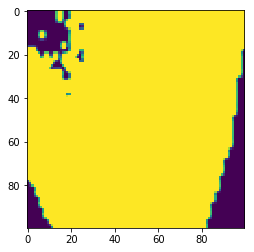

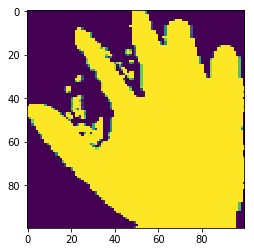

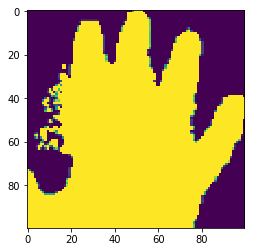

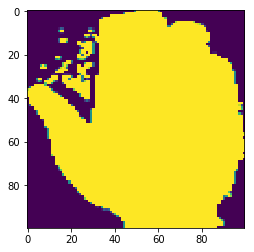

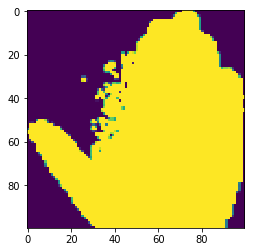

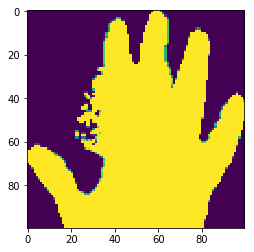

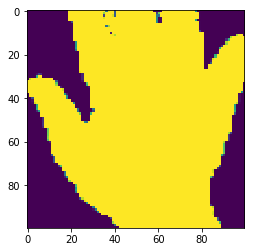

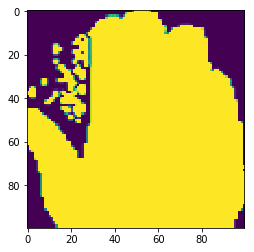

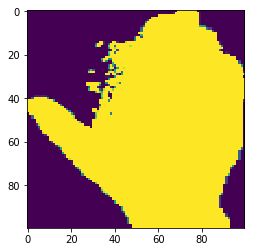

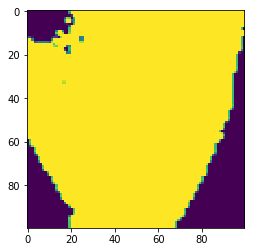

In [0]:
for i in range(0, 10):
  
  
    plt.figure()
    plt.imshow(x[i*500 , :, :])


### To Do: Convert labels to one-hot encoded vectors

In [0]:
# Please implement (from scratch) a function that converts the labels to one-hot encoded vectors

def encode_onehot(l):
  encoded = []
  m = len(np.unique(l))
  for i in l:
    z = np.zeros(m)
    z[i-1] = 1
    encoded.append(z)
    
  return encoded

In [0]:
y = encode_onehot(y)

In [0]:
y=np.asarray(y)
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### To Do: Split dataset into training and validation sets

In [0]:
# You may perform this by using your own functions or using an existing library module

x = x.reshape((59400, 100, 100, 1))

from sklearn.model_selection import train_test_split

x_train, x_testval, y_train, y_testval = train_test_split(x, y, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_testval, y_testval, test_size = 0.5)

### To Do: Visualize a few entries from dataset (Use matplotlib/OpenCV/PIL libraries)

Note : Visualized before reshaping x above , after loading the data.

In [0]:
#for i in range(0, 10):
#  
#  
#    plt.figure()
#    plt.imshow(x[i*500 , :, :])


### To Do (Optional): Perform pre-processing/augmentation/fine-tuning if necessary

### To Do: Define Network Architecture and Hyperparameters


In [0]:
#Define learning_rate, n_of_epochs, batch_size etc.


#Please mention in comments your rationale behind selecting architecture, loss function, optimizers and  
#other hyperparameters, with an overview of approach taken 

import keras
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model=models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(3, 3), activation='relu', input_shape=(100, 100,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.7))
model.add(layers.Dense(11, activation='softmax'))



Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model_history = model.fit(
    x_train, y_train,
    batch_size = 32,
    epochs = 15, 
    verbose=1, 
    validation_data=(x_val, y_val))


Instructions for updating:
Use tf.cast instead.
Train on 47520 samples, validate on 5940 samples
Epoch 1/15
47520/47520 [==============================] - 121s 3ms/step - loss: 0.9639 - acc: 0.6801 - val_loss: 0.5114 - val_acc: 0.8148
Epoch 2/15
47520/47520 [==============================] - 121s 3ms/step - loss: 0.4633 - acc: 0.8473 - val_loss: 0.2209 - val_acc: 0.9273
Epoch 3/15
47520/47520 [==============================] - 122s 3ms/step - loss: 0.3439 - acc: 0.8912 - val_loss: 0.2684 - val_acc: 0.9086
Epoch 4/15
47520/47520 [==============================] - 124s 3ms/step - loss: 0.2779 - acc: 0.9120 - val_loss: 0.2167 - val_acc: 0.9374
Epoch 5/15
47520/47520 [==============================] - 124s 3ms/step - loss: 0.2370 - acc: 0.9237 - val_loss: 0.1879 - val_acc: 0.9313
Epoch 6/15
47520/47520 [==============================] - 124s 3ms/step - loss: 0.2121 - acc: 0.9349 - val_loss: 0.1850 - val_acc: 0.9369
Epoch 7/15
47520/47520 [==============================] - 124s 3ms/step - l

### To Do: Plot Training/Validation Losses, and Calculate Accuracy

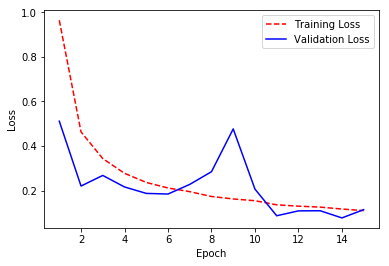

In [0]:
# 1) Using matplotlib, plot training loss, validation loss, training accuracy and 
#    validation accuracy with respect to epochs

training_loss = model_history.history['loss']
validation_loss = model_history.history['val_loss']

epoch_num = range(1, len(training_loss) + 1)

plt.plot(epoch_num, training_loss, 'r--')
plt.plot(epoch_num, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



In [0]:
# 2) Define a function that takes in as input an array of 'n' images, and a list of 'n' corresponding 
#    class labels, and returns average classification accuracy.

def classify_test(n):
  
  x_c = x_test[0:n-1]
  y_c = y_test[0:n-1]  
  
  [test_loss, test_acc] = model.evaluate(x_c, y_c, verbose = 1)
  print("Accuracy:" + str(test_acc * 100) + '%')
  

In [0]:
classify_test(1000)

999/999 [==============================] - 1s 767us/step
Accuracy:98.3983983983984%


In [0]:
classify_test(len(x_test))

5939/5939 [==============================] - 5s 806us/step
Accuracy:97.15440309816468%
